In [3]:
import numpy as np
import matplotlib.pyplot as pl
from rocsDB import rocsDB
import polars as po

no database config given, using /Users/bfmaier/.rocs_config/rocs_db.cfg


In [9]:
observables = [
    'impf_quote_voll_alter_unter12',
    'impf_quote_voll_alter_12bis17',
    'impf_quote_voll_alter_18bis59',
    'impf_quote_voll_alter_60plus',
]

dfs = []
db = rocsDB()
for observable in observables:
    data = db.submit_query(f"""
            SELECT
                days_since_jan1,
                value
            from
                coronacases.ard_rki_vaccination
            where
                region = 'DE'
            and
                metric = '{observable}'
            and
                date >= '2021-10-10'
            and
                date <= '2021-11-07'
            order by
                days_since_jan1
        """)
    columns = list(zip(*data))
    df = po.DataFrame({'days': columns[0], 'value': columns[1]})
    dfs.append(df)
db.close()

no database config given, using /Users/bfmaier/.rocs_config/rocs_db.cfg
[(648, 649, 650, 651, 652, 655, 656, 657, 658, 659, 662, 663, 664, 665, 666, 669, 670, 671, 672, 673, 676), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)]
[(648, 649, 650, 651, 652, 655, 656, 657, 658, 659, 662, 663, 664, 665, 666, 669, 670, 671, 672, 673, 676), (37.0, 37.2, 37.5, 37.8, 38.2, 38.6, 38.8, 39.1, 39.4, 39.7, 40.1, 40.3, 40.6, 40.9, 41.2, 41.6, 41.7, 41.9, 42.2, 42.5, 42.8)]
[(648, 649, 650, 651, 652, 655, 656, 657, 658, 659, 662, 663, 664, 665, 666, 669, 670, 671, 672, 673, 676), (71.1, 71.2, 71.3, 71.5, 71.6, 71.8, 71.9, 72.0, 72.1, 72.3, 72.4, 72.5, 72.6, 72.7, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.6)]
[(648, 649, 650, 651, 652, 655, 656, 657, 658, 659, 662, 663, 664, 665, 666, 669, 670, 671, 672, 673, 676), (84.6, 84.7, 84.7, 84.8, 84.8, 84.8, 84.9, 84.9, 84.9, 85.0, 85.0, 85.0, 85.1, 85.1, 85.2, 85.3, 85.3, 85.3, 85.4, 85.4, 85.5)]


impf_quote_voll_alter_unter12 0.0
impf_quote_voll_alter_12bis17 40.13103448275862
impf_quote_voll_alter_18bis59 72.43103448275862
impf_quote_voll_alter_60plus 85.05862068965519


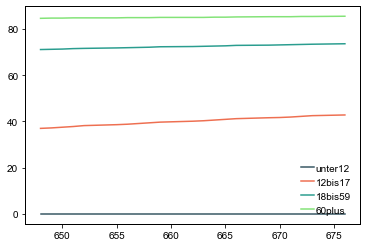

In [17]:
pl.figure()
for obs, df in zip(observables, dfs):
    t = df['days']
    y = df['value']
    tnew = np.arange(t[0],t[-1]+1)
    ynew = np.interp(tnew, t, y)
    mean = np.mean(ynew)
    print(obs, mean)
    pl.plot(df['days'],df['value'],label=obs.split('_')[-1])
pl.legend()

In [13]:
np.interp

<function numpy.interp(x, xp, fp, left=None, right=None, period=None)>